# An√°lisis Exploratorio de Datos (EDA)

Para comenzar con este eda, debemos haber previamente ejecutado el ETL sobre el dataset original de Yelp. Se explicar√° en la documentaci√≥n como se cre√≥ el dataset a travez de todos los archivos originales, y como se han cruzado los ID.

1. Carga y limpieza inicial
En esta primera etapa, se cargar√° el archivo meta_df.parquet y se realizar√° una limpieza inicial del DataFrame. Eliminaremos las columnas que no son relevantes para nuestro an√°lisis y filtraremos las que nos interesan, incluyendo informaci√≥n sobre rese√±as, ubicaciones, categor√≠as, calificaciones y otros detalles. Esto nos permitir√° enfocarnos en los datos m√°s √∫tiles para nuestro cliente.

In [1]:
import polars as pl
import pygwalker as pyg

from google.oauth2.service_account import Credentials
from google.cloud import storage
import gcsfs
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Configuraci√≥n de la autenticaci√≥n y creaci√≥n de FileSystem
fs = gcsfs.GCSFileSystem(token="credencial_karen_propietario.json")

# Ruta al archivo Parquet que incluye wildcard para m√∫ltiples archivos
path = 'gs://bucket-proyecto-final-1/datos-limpios/yelp/meta_df.parquet'


# Lee los archivos Parquet directamente en un DataFrame de Polars
# Nota: Polars puede leer directamente de un path, pero para usar con gcsfs, necesitamos abrir los archivos uno por uno
def read_parquet_files(path):
    files = fs.glob(path)
    frames = [pl.read_parquet(fs.open(file)) for file in files]
    return pl.concat(frames)

df = read_parquet_files(path)

In [3]:
df.schema

Schema([('review_id', String),
        ('user_id', String),
        ('business_id', String),
        ('stars_x', Int64),
        ('useful', Int64),
        ('funny', Int64),
        ('cool', Int64),
        ('text', String),
        ('date', Datetime(time_unit='ns', time_zone=None)),
        ('name', String),
        ('address', String),
        ('city', String),
        ('state', String),
        ('postal_code', String),
        ('latitude', Float64),
        ('longitude', Float64),
        ('stars_y', Float64),
        ('review_count', Int64),
        ('is_open', Int64),
        ('attributes', String),
        ('categories', List(String)),
        ('hours', String)])

In [4]:
#columnas que consideramos utiles para el analisis
columnas_utiles = [
    'review_id', 'user_id', 'business_id', 'stars_x', 'attributes', 'useful', 'funny', 'cool',
    'text', 'date', 'city', 'state', 'latitude', 'longitude', 'categories', 'hours' , 'name', 'review_count'
]

#filtrar las columnas que son utiles
df = df[columnas_utiles]

In [5]:
print(df.head(1))

shape: (1, 18)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ review_id  ‚îÜ user_id   ‚îÜ business_ ‚îÜ stars_x ‚îÜ ‚Ä¶ ‚îÜ categorie ‚îÜ hours     ‚îÜ name      ‚îÜ review_co ‚îÇ
‚îÇ ---        ‚îÜ ---       ‚îÜ id        ‚îÜ ---     ‚îÜ   ‚îÜ s         ‚îÜ ---       ‚îÜ ---       ‚îÜ unt       ‚îÇ
‚îÇ str        ‚îÜ str       ‚îÜ ---       ‚îÜ i64     ‚îÜ   ‚îÜ ---       ‚îÜ str       ‚îÜ str       ‚îÜ ---       ‚îÇ
‚îÇ            ‚îÜ           ‚îÜ str       ‚îÜ         ‚îÜ   ‚îÜ list[str] ‚îÜ           ‚îÜ           ‚îÜ i64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê

2. Estados con m√°s rese√±as
En este paso, contaremos el n√∫mero de rese√±as por estado, las ordenaremos de mayor a menor y generaremos un gr√°fico para visualizar los estados con mayor actividad de rese√±as. Este an√°lisis nos ayudar√° a identificar los mercados m√°s relevantes para la expansi√≥n de la cadena de restaurantes.
* Consideraremos los estados que incluyan una buena cantidad de rese√±as, ignoraremos las que tienen un numero insignificativo de estas.

In [6]:
import polars as pl
import plotly.express as px

# Filtrar los datos excluyendo registros con "valor incompleto" en el estado
df_filtrado = df.filter(pl.col("state") != "valor incompleto")

# Contar el n√∫mero de rese√±as por estado y obtener latitud y longitud
rese√±as_por_estado = (
    df_filtrado.group_by("state")
    .agg(
        pl.count().alias("review_count"),
        pl.first("latitude").alias("latitude"),   # Obtener la primera latitud para cada estado
        pl.first("longitude").alias("longitude")   # Obtener la primera longitud para cada estado
    )
    .sort("review_count", descending=True)
)

# Filtrar los estados con al menos 10,000 rese√±as
rese√±as_significativas = rese√±as_por_estado.filter(pl.col("review_count") >= 10000)

# Mostrar los estados con mayor n√∫mero de rese√±as
print("Estados con m√°s rese√±as:")
print(rese√±as_significativas)

# Graficar solo los estados con rese√±as significativas
fig = px.bar(
    rese√±as_significativas.to_dicts(),
    x="state",
    y="review_count",
    title="Estados con Mayor N√∫mero de Rese√±as",
    labels={"review_count": "N√∫mero de Rese√±as", "state": "Estado"}
)

# Mostrar la gr√°fica
fig.show()



C:\Users\KAREN\AppData\Local\Temp\ipykernel_1340\2732718963.py:11: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("review_count"),


Estados con m√°s rese√±as:
shape: (14, 4)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ state ‚îÜ review_count ‚îÜ latitude  ‚îÜ longitude   ‚îÇ
‚îÇ ---   ‚îÜ ---          ‚îÜ ---       ‚îÜ ---         ‚îÇ
‚îÇ str   ‚îÜ u32          ‚îÜ f64       ‚îÜ f64         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ PA    ‚îÜ 1151002      ‚îÜ 40.210196 ‚îÜ -75.223639  ‚îÇ
‚îÇ FL    ‚îÜ 885484       ‚îÜ 34.416984 ‚îÜ -119.695556 ‚îÇ
‚îÇ TN    ‚îÜ 406893       ‚îÜ 27.941975 ‚îÜ -82.505307  ‚îÇ
‚îÇ MO    ‚îÜ 365908       ‚îÜ 39.949529 ‚îÜ -75.152139  ‚îÇ
‚îÇ IN    ‚îÜ 356811       ‚îÜ 38.589429 ‚îÜ -90.30764   ‚îÇ
‚îÇ ‚Ä¶     ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶           ‚îÇ
‚îÇ AB    ‚îÜ 188924       ‚îÜ 40.079848 ‚îÜ -75.02508   ‚îÇ
‚îÇ CA    ‚îÜ 169848       ‚îÜ 32.2558

3. En este an√°lisis, identificaremos las categor√≠as de negocios con m√°s rese√±as, lo que puede indicar su popularidad y relevancia en el mercado. Filtraremos categor√≠as relacionadas con la industria de alimentos y restaurantes para proporcionar informaci√≥n valiosa para el cliente.

In [7]:
import polars as pl
import plotly.express as px

# Crear un DataFrame simplificado con solo las columnas necesarias
df_simple = df.select(['categories', 'review_count'])

# Expandir la lista de categor√≠as en filas individuales
df_simple = df_simple.explode('categories')

# Filtrar las categor√≠as relevantes relacionadas con la industria de alimentos y restaurantes
categorias_relevantes = [
    'Restaurants', 'Food', 'American (Traditional)', 'American (New)',
    'Breakfast & Brunch', 'Sandwiches', 'Seafood', 'Pizza', 'Coffee & Tea',
    'Italian', 'Burgers', 'Mexican', 'Salad', 'Cocktail Bars'
]
df_simple = df_simple.filter(pl.col("categories").is_in(categorias_relevantes))

# Contar la cantidad de rese√±as por categor√≠a
rese√±as_por_categoria = (
    df_simple
    .group_by("categories")
    .agg(pl.count().alias("review_count"))
    .sort("review_count", descending=True)
    .head(20)
)

# Convertir a un diccionario para graficar
rese√±as_por_categoria_dict = rese√±as_por_categoria.to_dicts()

# Graficar las categor√≠as con m√°s rese√±as
fig = px.bar(
    rese√±as_por_categoria_dict,
    x='categories', 
    y='review_count',
    title='Categor√≠as con Mayor N√∫mero de Rese√±as (Relevantes)',
    labels={'review_count': 'N√∫mero de Rese√±as', 'categories': 'Categor√≠a'}
)
fig.show()



C:\Users\KAREN\AppData\Local\Temp\ipykernel_1340\3141075361.py:22: DeprecationWarning:

`pl.count()` is deprecated. Please use `pl.len()` instead.



In [8]:
import polars as pl
import plotly.express as px

# Crear un DataFrame simplificado con solo las columnas necesarias
df_categories = df.select(['categories', 'review_count'])

# Expandir la lista de categor√≠as en filas individuales
df_categories = df_categories.explode('categories')

# Contar la cantidad de rese√±as por categor√≠a
rese√±as_por_categoria = (
    df_categories
    .group_by("categories")
    .agg(pl.count().alias("review_count"))
    .sort("review_count", descending=True)
    .head(20)
)

# Convertir a un diccionario para graficar
rese√±as_por_categoria_dict = rese√±as_por_categoria.to_dicts()

# Graficar las categor√≠as con m√°s rese√±as
fig = px.bar(
    rese√±as_por_categoria_dict,
    x='categories', 
    y='review_count',
    title='Categor√≠as con Mayor N√∫mero de Rese√±as',
    labels={'review_count': 'N√∫mero de Rese√±as', 'categories': 'Categor√≠a'}
)
fig.show()

C:\Users\KAREN\AppData\Local\Temp\ipykernel_1340\697021722.py:14: DeprecationWarning:

`pl.count()` is deprecated. Please use `pl.len()` instead.



4. An√°lisis de Frecuencia de Palabras en las Rese√±as
Para entender mejor las rese√±as de los clientes, realizamos un an√°lisis de frecuencia de palabras en el texto de las rese√±as. Hemos limpiado el texto para eliminar caracteres especiales y convertimos las palabras a min√∫sculas. Utilizamos CountVectorizer para identificar las palabras m√°s comunes, excluyendo las palabras comunes del idioma ingl√©s (stop words). Esto nos permite centrarnos en los t√©rminos que pueden ser m√°s relevantes para analizar la satisfacci√≥n del cliente y sus principales preocupaciones.

In [4]:
#analisis de frecuencia de palabras en las resenas

from sklearn.feature_extraction.text import CountVectorizer
import re

#eliminar caracteres especiales y convertir el texto a minusculas
df['text_clean'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x)).lower())

#configurar el countvectorizer para excluir palabras comunes en ingles (stop words)
vectorizer = CountVectorizer(stop_words='english', max_features=50)

#ajustar el vectorizer al texto limpio
X = vectorizer.fit_transform(df['text_clean'])

#obtener las palabras mas frecuentes y sus recuentos
frequencies = zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))
sorted_frequencies = sorted(frequencies, key=lambda x: x[1], reverse=True)

#mostrar las 20 palabras mas comunes
print("Palabras m√°s comunes en las rese√±as:")
for word, count in sorted_frequencies[:20]:
    print(f"{word}: {count}")

#graficar las palabras mas comunes
top_words = sorted_frequencies[:20]
words, counts = zip(*top_words)
fig = px.bar(x=words, y=counts, title='Palabras M√°s Comunes en las Rese√±as', labels={'x': 'Palabras', 'y': 'Frecuencia'})
fig.show()


Palabras m√°s comunes en las rese√±as:
food: 2704176
good: 2649062
place: 2471876
great: 2272975
just: 1792952
like: 1771210
time: 1693208
service: 1648035
really: 1313537
got: 1037602
nice: 971811
dont: 958351
im: 903784
ordered: 900239
best: 890305
ive: 873296
order: 863527
love: 834292
staff: 819090
did: 790327


### Interpretaci√≥n de resultados:

* "food" (2.7M veces mencionada): La comida es claramente el tema principal en las rese√±as, lo cual es esperado para un restaurante. Es importante analizar el contexto en el que se menciona "food" (positivo o negativo) para entender si los clientes est√°n satisfechos con la calidad de los platos.

* "good" (2.6M veces) y "great" (2.3M veces): Estas palabras sugieren que muchos clientes tienen experiencias positivas en los establecimientos. Se podr√≠a profundizar en las frases que rodean estas palabras para conocer qu√© aspectos espec√≠ficos (calidad de la comida, servicio, ambiente) se consideran "buenos" o "excelentes".

* "place" (2.4M veces): Los clientes suelen referirse al restaurante en general. Esta palabra, combinada con t√©rminos como "nice", "great", o "location", puede ayudar a identificar si la ubicaci√≥n y el ambiente del restaurante son atractivos para los clientes.

* "service" (1.6M veces): El servicio es un factor crucial para la satisfacci√≥n del cliente. Es importante analizar el contexto en el que se menciona "service" para detectar si las menciones son positivas (e.g., "great service") o negativas (e.g., "poor service").

* "ordered", "order" (900K+ veces): Las palabras relacionadas con los pedidos sugieren que los clientes est√°n comentando sobre su experiencia con el proceso de orden. Esto puede incluir la precisi√≥n de los pedidos, la rapidez o problemas con la comida solicitada.

* "staff" (819K veces): Los empleados son un componente clave en la experiencia del cliente. Evaluar si las menciones son positivas (e.g., "friendly staff") o negativas (e.g., "rude staff") ayudar√° a identificar √°reas de mejora en el servicio.

* "love", "best", "really": Estas palabras indican fuertes sentimientos positivos, lo que es una buena se√±al. Es √∫til revisar las frases completas para entender qu√© aspectos generan tanto entusiasmo.

___

5. An√°lisis de Sentimientos en las Rese√±as

Para identificar la actitud general en las rese√±as, se realiz√≥ un an√°lisis de sentimientos utilizando la librer√≠a `TextBlob`, la cual eval√∫a la polaridad de cada comentario:

- **Positivo:** Polaridad mayor a 0.2.
- **Negativo:** Polaridad menor a -0.2.
- **Neutral:** Polaridad entre -0.2 y 0.2.

El objetivo es categorizar las rese√±as en estos tres grupos para entender mejor la percepci√≥n de los usuarios.

El c√≥digo utilizado para clasificar los sentimientos y graficar la distribuci√≥n es el siguiente:


In [5]:
import pandas as pd
from textblob import TextBlob
import plotly.express as px

#tomar una muestra aleatoria del 30% del dataframe
df_muestra = df.sample(frac=0.3, random_state=42)

#funcion para clasificar el sentimiento basado en la polaridad
def clasificar_sentimiento(texto):
    polaridad = TextBlob(texto).sentiment.polarity
    if polaridad > 0.2:
        return 'positivo'
    elif polaridad < -0.2:
        return 'negativo'
    else:
        return 'neutral'

#aplicar la funcion de clasificacion de sentimientos a la muestra
df_muestra['sentimiento'] = df_muestra['text'].apply(clasificar_sentimiento)

#verificar la cantidad de resenas positivas, negativas y neutrales
sentimientos_contados = df_muestra['sentimiento'].value_counts()
print("Distribuci√≥n de Sentimientos en las Rese√±as:")
print(sentimientos_contados)

#graficar la distribucion de sentimientos
fig = px.bar(sentimientos_contados, x=sentimientos_contados.index, y=sentimientos_contados.values,
             title='Distribuci√≥n de Sentimientos en las Rese√±as (Muestra de un %)',
             labels={'x': 'Sentimiento', 'y': 'Cantidad de Rese√±as'})
fig.show()


Distribuci√≥n de Sentimientos en las Rese√±as:
sentimiento
positivo    902368
neutral     581130
negativo     41295
Name: count, dtype: int64


6. An√°lisis de Categor√≠as seg√∫n el Sentimiento de las Rese√±as

En esta secci√≥n, analizaremos la relaci√≥n entre el tipo de sentimiento en las rese√±as (positivo, neutral, negativo) y las categor√≠as de los negocios. Este an√°lisis nos permitir√° identificar cu√°les son las categor√≠as que tienden a recibir mejores o peores rese√±as, lo cual puede ser √∫til para priorizar estrategias de marketing o tomar decisiones operativas.

El an√°lisis consiste en:
- Filtrar los datos por el tipo de sentimiento (positivo, neutral, negativo).
- Contar la cantidad de negocios para cada categor√≠a en cada grupo de sentimiento.
- Visualizar las 10 categor√≠as m√°s comunes en funci√≥n del sentimiento, con el fin de identificar patrones de satisfacci√≥n o insatisfacci√≥n entre los clientes.


In [6]:
import pandas as pd
import plotly.express as px

#filtrar los datos por tipo de sentimiento
df_positivo = df_muestra[df_muestra['sentimiento'] == 'positivo']
df_neutral = df_muestra[df_muestra['sentimiento'] == 'neutral']
df_negativo = df_muestra[df_muestra['sentimiento'] == 'negativo']

#analisis de categorias
#contar la cantidad de negocios por categoria y sentimiento
def contar_categorias(df, tipo_sentimiento):
    categorias_exploded = df.explode('categories')
    categorias_contadas = categorias_exploded['categories'].value_counts().reset_index()
    categorias_contadas.columns = ['category', 'count']
    categorias_contadas['sentimiento'] = tipo_sentimiento
    return categorias_contadas

categorias_positivas = contar_categorias(df_positivo, 'positivo')
categorias_neutrales = contar_categorias(df_neutral, 'neutral')
categorias_negativas = contar_categorias(df_negativo, 'negativo')

#combinar los resultados en un solo dataframe
categorias_sentimiento = pd.concat([categorias_positivas, categorias_neutrales, categorias_negativas])

#graficar las 10 categorias mas comunes por sentimiento
fig = px.bar(categorias_sentimiento[categorias_sentimiento['category'].isin(
    categorias_sentimiento.groupby('category')['count'].sum().nlargest(10).index)],
    x='category', y='count', color='sentimiento', 
    title='Top 10 Categor√≠as seg√∫n el Sentimiento de las Rese√±as',
    labels={'count': 'Cantidad de Negocios', 'category': 'Categor√≠a'},
    barmode='group')
fig.show()


7. An√°lisis de la Distribuci√≥n Geogr√°fica de las Rese√±as seg√∫n el Sentimiento

Este an√°lisis busca entender la distribuci√≥n geogr√°fica de las rese√±as, considerando el tipo de sentimiento (positivo, neutral, negativo) en cada estado. Con esto, podemos identificar si existen diferencias significativas en la satisfacci√≥n de los clientes dependiendo de la ubicaci√≥n geogr√°fica.

Los pasos para este an√°lisis son:
- Filtrar los datos por el tipo de sentimiento para agrupar las rese√±as en positivo, neutral y negativo.
- Contar la cantidad de rese√±as por estado en cada grupo de sentimiento.
- Visualizar los resultados para analizar la variaci√≥n en la cantidad de rese√±as y sentimientos a lo largo de diferentes estados.


In [7]:
#analisis de distribucion geografica
#contar la cantidad de resenas por estado y sentimiento
def contar_por_estado(df, tipo_sentimiento):
    estados_contados = df['state'].value_counts().reset_index()
    estados_contados.columns = ['state', 'count']
    estados_contados['sentimiento'] = tipo_sentimiento
    return estados_contados

estados_positivos = contar_por_estado(df_positivo, 'positivo')
estados_neutrales = contar_por_estado(df_neutral, 'neutral')
estados_negativos = contar_por_estado(df_negativo, 'negativo')

#combinar los resultados en un solo dataframe
estados_sentimiento = pd.concat([estados_positivos, estados_neutrales, estados_negativos])

#graficar la distribucion de resenas por estado y sentimiento
fig = px.bar(estados_sentimiento, x='state', y='count', color='sentimiento',
             title='Distribuci√≥n de Rese√±as por Estado y Sentimiento',
             labels={'count': 'Cantidad de Rese√±as', 'state': 'Estado'},
             barmode='group')
fig.show()


8. An√°lisis de Servicios o Caracter√≠sticas y su Relaci√≥n con el Sentimiento

En esta secci√≥n, exploraremos la relaci√≥n entre los servicios o caracter√≠sticas de los negocios (representados en la columna `attributes`) y el sentimiento de las rese√±as. La columna `attributes` contiene informaci√≥n valiosa sobre las caracter√≠sticas de cada negocio, como si permiten mascotas, ofrecen Wi-Fi gratis, tienen m√∫sica en vivo, entre otros.

Para este an√°lisis:
- Expandiremos la columna `attributes` para convertir los datos en un formato manejable.
- Filtraremos los negocios en funci√≥n del sentimiento de las rese√±as (positivo, neutral y negativo).
- Contaremos la frecuencia de los atributos en cada grupo de sentimiento.
- Graficaremos los atributos m√°s comunes para ver si algunos est√°n asociados con rese√±as m√°s positivas o negativas.

El objetivo es identificar qu√© caracter√≠sticas o servicios est√°n vinculados a una percepci√≥n m√°s favorable de los negocios, lo que puede ayudar a la cadena de restaurantes a decidir qu√© servicios ofrecer para mejorar la experiencia del cliente.


In [8]:
import ast

def expandir_atributos(df):
    #verificar que los valores sean validos y no 'valor incompleto'
    df['attributes'] = df['attributes'].apply(
        lambda x: ast.literal_eval(x) if pd.notnull(x) and isinstance(x, str) and x != 'valor incompleto' else {}
    )
    
    #expandir el diccionario de atributos en columnas separadas
    atributos_expandidos = df['attributes'].apply(pd.Series)
    df_expanded = pd.concat([df, atributos_expandidos], axis=1)
    return df_expanded

#expandir los atributos en el dataframe original
df_expanded = expandir_atributos(df_muestra)

#continuar con el analisis segun el sentimiento
df_positivo = df_expanded[df_expanded['sentimiento'] == 'positivo']
df_neutral = df_expanded[df_expanded['sentimiento'] == 'neutral']
df_negativo = df_expanded[df_expanded['sentimiento'] == 'negativo']


10. An√°lisis de la Distribuci√≥n Temporal de las Rese√±as

Este an√°lisis examina cu√°ndo los clientes tienden a dejar rese√±as en funci√≥n del d√≠a de la semana y la hora del d√≠a. Al agregar columnas que representan el d√≠a y la hora, podemos identificar los patrones temporales de actividad en las rese√±as. Esto proporciona informaci√≥n sobre los momentos de mayor interacci√≥n con los clientes, lo que puede ser √∫til para optimizar estrategias de marketing o gesti√≥n de la operaci√≥n en funci√≥n de los d√≠as y horarios con mayor actividad.

In [9]:
import polars as pl

# Crear nuevas columnas con el d√≠a de la semana, hora del d√≠a y a√±o directamente de la columna `date`
df = df.with_columns([
    pl.col("date").dt.weekday().alias("day_of_week"),  # D√≠a de la semana (0=Lunes, 6=Domingo)
    pl.col("date").dt.hour().alias("hour_of_day"),     # Hora del d√≠a
    pl.col("date").dt.year().alias("year")             # A√±o
])


In [10]:
import plotly.express as px

# Contar la cantidad de rese√±as por d√≠a de la semana
resenas_por_dia = (
    df.group_by("day_of_week")
    .agg(pl.count().alias("count"))
    .sort("day_of_week")
)

# Graficar directamente con Plotly Express
fig_dia = px.bar(resenas_por_dia.to_dicts(), x='day_of_week', y='count',
                 title='Distribuci√≥n de Rese√±as por D√≠a de la Semana',
                 labels={'count': 'Cantidad de Rese√±as', 'day_of_week': 'D√≠a de la Semana'})
fig_dia.show()


C:\Users\KAREN\AppData\Local\Temp\ipykernel_1340\3438887298.py:6: DeprecationWarning:

`pl.count()` is deprecated. Please use `pl.len()` instead.



In [11]:
# Contar la cantidad de rese√±as por hora del d√≠a
resenas_por_hora = (
    df.group_by("hour_of_day")
    .agg(pl.count().alias("count"))
    .sort("hour_of_day")
)

# Graficar directamente con Plotly Express
fig_hora = px.bar(resenas_por_hora.to_dicts(), x='hour_of_day', y='count',
                  title='Distribuci√≥n de Rese√±as por Hora del D√≠a',
                  labels={'count': 'Cantidad de Rese√±as', 'hour_of_day': 'Hora del D√≠a'})
fig_hora.show()


C:\Users\KAREN\AppData\Local\Temp\ipykernel_1340\2227376188.py:4: DeprecationWarning:

`pl.count()` is deprecated. Please use `pl.len()` instead.



In [12]:
import polars as pl
import plotly.express as px

# Crear un nuevo DataFrame con solo las columnas 'date' y 'review_count'
df_ano_rese√±as = df.select([
    pl.col("date").dt.year().alias("year"),  # Extraer el a√±o
    pl.lit(1).alias("review_count")            # Contar cada rese√±a como 1
])

# Agrupar por a√±o y contar las rese√±as
df_ano_rese√±as = df_ano_rese√±as.group_by("year").agg(
    pl.sum("review_count").alias("total_reviews")  # Sumar el conteo de rese√±as por a√±o
).sort("year")  # Ordenar por a√±o

# Convertir a un formato adecuado para Plotly
df_ano_rese√±as_pd = df_ano_rese√±as.to_pandas()

# Graficar la secuencia de rese√±as por a√±o
fig = px.line(df_ano_rese√±as_pd, x='year', y='total_reviews',
              title='Cantidad de Rese√±as por A√±o',
              labels={'total_reviews': 'Cantidad de Rese√±as', 'year': 'A√±o'},
              markers=True)  # Usar marcadores para visualizar puntos de datos

# Mostrar la gr√°fica
fig.show()


11. An√°lisis de Palabras Comunes en las Rese√±as Positivas y Negativas

Este an√°lisis identifica las palabras m√°s comunes en las rese√±as positivas y negativas, excluyendo palabras vac√≠as (stopwords) que no aportan significado. Al filtrar y contar las palabras m√°s frecuentes en cada tipo de sentimiento, podemos entender los aspectos m√°s destacados tanto en las experiencias positivas como en las negativas de los clientes. Esto ayuda a resaltar los puntos fuertes y las √°reas de mejora seg√∫n la opini√≥n de los usuarios.

In [11]:
from collections import Counter
from nltk.corpus import stopwords
import pandas as pd
import plotly.express as px
import nltk

#descargar las stopwords en caso de no tenerlas
nltk.download('stopwords')

#lista de stopwords en ingles
stop_words = set(stopwords.words('english'))

#funcion para extraer palabras comunes de las resenas por sentimiento, excluyendo stopwords
def extraer_palabras_comunes(df, sentimiento, top_n=20):
    #filtrar las resenas segun el sentimiento
    df_sentimiento = df[df['sentimiento'] == sentimiento]
    
    #combinar todos los textos de resenas en una sola cadena
    texto_completo = ' '.join(df_sentimiento['text_clean'].dropna().values)
    
    #filtrar palabras que no sean stopwords
    palabras = [palabra for palabra in texto_completo.split() if palabra.lower() not in stop_words]
    
    #contar las palabras mas comunes
    palabras_comunes = Counter(palabras)
    
    #seleccionar las top_n palabras mas comunes
    palabras_comunes_df = pd.DataFrame(palabras_comunes.most_common(top_n), columns=['palabra', 'frecuencia'])
    palabras_comunes_df['sentimiento'] = sentimiento
    
    return palabras_comunes_df

#extraer palabras comunes para resenas positivas y negativas
palabras_positivas = extraer_palabras_comunes(df_muestra, 'positivo', top_n=20)
palabras_negativas = extraer_palabras_comunes(df_muestra, 'negativo', top_n=20)

#combinar los resultados en un solo dataframe
palabras_comunes = pd.concat([palabras_positivas, palabras_negativas])

#graficar las palabras mas comunes por sentimiento
fig_palabras = px.bar(palabras_comunes, x='palabra', y='frecuencia', color='sentimiento',
                      title='Aspectos Positivos y Negativos en las Rese√±as',
                      labels={'frecuencia': 'Frecuencia de Palabras', 'palabra': 'Palabra'},
                      barmode='group')
fig_palabras.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


9. An√°lisis de Estados con Menciones de Categorias Clave Relacionadas con la comida rapida y la comida de mar

En este an√°lisis, identificamos locales que cuenten con las categorias mas relevantes para el cliente, como lo son "Seafood" y "Fast Food". Filtramos las locales para verificar si contienen estas categorias y luego analizamos la distribuci√≥n por estado. Esto nos permite identificar las regiones con mayor inter√©s de la poblacion en consumir comida rapida y comida de mar , ayudando al cliente a tomar decisiones informadas sobre d√≥nde establecer su negocio.

In [13]:
import polars as pl
import plotly.express as px

# Funci√≥n para contar rese√±as relacionadas con comida r√°pida por estado
def count_fastfood_reviews_by_state(df):
    results = {}
    
    # Obtener estados √∫nicos
    unique_states = df['state'].unique().to_list()

    for state in unique_states:
        # Filtrar el DataFrame por el estado actual y la categor√≠a "Fast Food"
        state_df = df.filter(
            (pl.col("state") == state) &
            (pl.col("categories").list.contains("Fast Food"))
        )
        
        # Contar las rese√±as en los locales de comida r√°pida
        fastfood_count = state_df.height  # N√∫mero total de rese√±as en el estado para "Fast Food"
        
        results[state] = fastfood_count

    return results

# Supongamos que df ya est√° definido en tu entorno

# Contar rese√±as de comida r√°pida en cada estado
fastfood_reviews_count = count_fastfood_reviews_by_state(df)

# Convertir el resultado en un DataFrame usando una lista de tuplas
fastfood_reviews_df = pl.DataFrame(list(fastfood_reviews_count.items()), schema=["state", "count"])

# Obtener el top 10 estados con m√°s rese√±as de comida r√°pida
top_10_fastfood_reviews = fastfood_reviews_df.sort("count", descending=True).head(10)

# Convertir a pandas para graficar
top_10_fastfood_reviews_pd = top_10_fastfood_reviews.to_pandas()

# Crear un gr√°fico de barras usando Plotly Express
fig = px.bar(top_10_fastfood_reviews_pd, 
             x='count', 
             y='state', 
             title='Top 10 Estados con m√°s Rese√±as de Comida R√°pida',
             labels={'count': 'N√∫mero de Rese√±as sobre Comida R√°pida', 'state': 'Estado'},
             orientation='h',  # Gr√°fico horizontal
             color='count',  # Colorear seg√∫n el n√∫mero de rese√±as
             color_continuous_scale=px.colors.sequential.Blugrn)  # Escala de colores

# Mostrar el gr√°fico
fig.show()



C:\Users\KAREN\AppData\Local\Temp\ipykernel_1340\3658661641.py:31: DataOrientationWarning:

Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.



In [14]:
import polars as pl
import plotly.express as px

# Lista de palabras clave en ingl√©s relacionadas con mariscos
seafood_keywords = [
    "seafood", "fish", "shrimp", "lobster", "crab", "oyster",
    "clam", "mussels", "scallops", "cuttlefish", "squid", "octopus",
    "prawn", "salmon", "tuna", "cod", "haddock", "bass", "trout",
    "caviar", "anchovy", "mackerel", "perch", "sardine"
]

# Funci√≥n para contar rese√±as relacionadas con mariscos por estado
def count_seafood_reviews_by_state(df, keywords):
    pattern = "|".join(keywords)  # Crear el patr√≥n de b√∫squeda
    results = {}
    
    # Obtener estados √∫nicos
    unique_states = df['state'].unique().to_list()

    for state in unique_states:
        # Filtrar el DataFrame por el estado actual
        state_df = df.filter(pl.col("state") == state)
        
        # Contar las rese√±as relacionadas con mariscos
        seafood_count = state_df.filter(
            pl.col("text").str.to_lowercase().str.contains(pattern)
        ).height
        
        results[state] = seafood_count

    return results

# Supongamos que df ya est√° definido en tu entorno

# Contar rese√±as de mariscos en cada estado
seafood_reviews_count = count_seafood_reviews_by_state(df, seafood_keywords)

# Convertir el resultado en un DataFrame usando una lista de tuplas
seafood_reviews_df = pl.DataFrame(list(seafood_reviews_count.items()), schema=["state", "count"])

# Obtener el top 10 estados con m√°s rese√±as de mariscos
top_10_seafood_reviews = seafood_reviews_df.sort("count", descending=True).head(10)

# Convertir a pandas para graficar
top_10_seafood_reviews_pd = top_10_seafood_reviews.to_pandas()

# Crear un gr√°fico de barras usando Plotly Express
fig = px.bar(top_10_seafood_reviews_pd, 
             x='count', 
             y='state', 
             title='Top 10 Estados con m√°s Rese√±as de Mariscos',
             labels={'count': 'N√∫mero de Rese√±as sobre Mariscos', 'state': 'Estado'},
             orientation='h',  # Gr√°fico horizontal
             color='count',  # Colorear seg√∫n el n√∫mero de rese√±as
             color_continuous_scale=px.colors.sequential.Blugrn)  # Escala de colores

# Mostrar el gr√°fico
fig.show()


C:\Users\KAREN\AppData\Local\Temp\ipykernel_1340\4216167537.py:39: DataOrientationWarning:

Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.



## Conclusiones

* Teniendo en cuenta los graficos se puede observar una clara tendencia de los estados de Pensilvania (PA), Florida (FL) y Tenneesse (TN) tanto por la comida rapida como por la comida de mar por lo cual se realizara un analisis mas profundo a estos tres estados para dar sugerencias mas claras al cliente

# Filtrado por estado

In [15]:
# Filtrar el DataFrame original por cada estado
df_pensilvania = df.filter(pl.col("state") == "PA")
df_florida = df.filter(pl.col("state") == "FL")
df_tenesse = df.filter(pl.col("state") == "TN")


In [16]:
# Confirmaci√≥n
print(df_pensilvania.head(1))
print(df_pensilvania.shape)


shape: (1, 21)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ review_id  ‚îÜ user_id    ‚îÜ business_i ‚îÜ stars_x ‚îÜ ‚Ä¶ ‚îÜ review_cou ‚îÜ day_of_wee ‚îÜ hour_of_da ‚îÜ year ‚îÇ
‚îÇ ---        ‚îÜ ---        ‚îÜ d          ‚îÜ ---     ‚îÜ   ‚îÜ nt         ‚îÜ k          ‚îÜ y          ‚îÜ ---  ‚îÇ
‚îÇ str        ‚îÜ str        ‚îÜ ---        ‚îÜ i64     ‚îÜ   ‚îÜ ---        ‚îÜ ---        ‚îÜ ---        ‚îÜ i32  ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ str        ‚îÜ         ‚îÜ   ‚îÜ i64        ‚îÜ i8         ‚îÜ i8         ‚îÜ      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

In [17]:
print(df_florida.head(1))
print(df_florida.shape)

shape: (1, 21)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ review_id  ‚îÜ user_id    ‚îÜ business_i ‚îÜ stars_x ‚îÜ ‚Ä¶ ‚îÜ review_cou ‚îÜ day_of_wee ‚îÜ hour_of_da ‚îÜ year ‚îÇ
‚îÇ ---        ‚îÜ ---        ‚îÜ d          ‚îÜ ---     ‚îÜ   ‚îÜ nt         ‚îÜ k          ‚îÜ y          ‚îÜ ---  ‚îÇ
‚îÇ str        ‚îÜ str        ‚îÜ ---        ‚îÜ i64     ‚îÜ   ‚îÜ ---        ‚îÜ ---        ‚îÜ ---        ‚îÜ i32  ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ str        ‚îÜ         ‚îÜ   ‚îÜ i64        ‚îÜ i8         ‚îÜ i8         ‚îÜ      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

In [18]:
print(df_tenesse.head(1))
print(df_tenesse.shape)

shape: (1, 21)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ review_id  ‚îÜ user_id    ‚îÜ business_i ‚îÜ stars_x ‚îÜ ‚Ä¶ ‚îÜ review_cou ‚îÜ day_of_wee ‚îÜ hour_of_da ‚îÜ year ‚îÇ
‚îÇ ---        ‚îÜ ---        ‚îÜ d          ‚îÜ ---     ‚îÜ   ‚îÜ nt         ‚îÜ k          ‚îÜ y          ‚îÜ ---  ‚îÇ
‚îÇ str        ‚îÜ str        ‚îÜ ---        ‚îÜ i64     ‚îÜ   ‚îÜ ---        ‚îÜ ---        ‚îÜ ---        ‚îÜ i32  ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ str        ‚îÜ         ‚îÜ   ‚îÜ i64        ‚îÜ i8         ‚îÜ i8         ‚îÜ      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

In [19]:
import polars as pl
import pandas as pd
import plotly.express as px

# Lista de palabras clave en ingl√©s relacionadas con mariscos
seafood_keywords = [
    "seafood", "fish", "shrimp", "lobster", "crab", "oyster",
    "clam", "mussels", "scallops", "cuttlefish", "squid", "octopus",
    "prawn", "salmon", "tuna", "cod", "haddock", "bass", "trout",
    "caviar", "anchovy", "mackerel", "perch", "sardine"
]

# Funci√≥n para contar rese√±as relacionadas con mariscos
def count_seafood_reviews(df, keywords):
    pattern = "|".join(keywords)  # Crear el patr√≥n de b√∫squeda
    return df.filter(
        pl.col("text").str.to_lowercase().str.contains(pattern)
    ).height

# Contar rese√±as de mariscos en cada DataFrame
num_seafood_reviews_pa = count_seafood_reviews(df_pensilvania, seafood_keywords)
num_seafood_reviews_fl = count_seafood_reviews(df_florida, seafood_keywords)
num_seafood_reviews_tn = count_seafood_reviews(df_tenesse, seafood_keywords)

# Crear un DataFrame de Pandas para Plotly
seafood_reviews_data = {
    "Estado": ["Pensilvania", "Florida", "Tennessee"],
    "Rese√±as de Mariscos": [num_seafood_reviews_pa, num_seafood_reviews_fl, num_seafood_reviews_tn]
}
seafood_reviews_df = pd.DataFrame(seafood_reviews_data)

# Crear gr√°fico de pastel
fig = px.pie(seafood_reviews_df, values='Rese√±as de Mariscos', names='Estado', title='Rese√±as de Mariscos por Estado')
fig.show()


In [20]:
# Funci√≥n para obtener los 5 locales m√°s frecuentes relacionados con mariscos, incluyendo la categor√≠a
def top_3_seafood_places(df, keywords):
    pattern = "|".join(keywords)  # Crear el patr√≥n de b√∫squeda
    filtered_df = df.filter(
        pl.col("text").str.to_lowercase().str.contains(pattern)  # Filtrar rese√±as de mariscos
    )
    
    # Agrupar por 'name', contar las ocurrencias, obtener la categor√≠a y ordenar
    top_places = (
        filtered_df
        .group_by("name")
        .agg([
            pl.count().alias("review_count"),
            pl.col("categories").first().alias("category")  # Tomar la primera categor√≠a asociada al local
        ])
        .sort("review_count", descending=True)
        .limit(4)  # Seleccionar los 5 m√°s frecuentes
    )
    return top_places

In [21]:
# Obtener los 3 locales m√°s frecuentes con categor√≠a para cada estado
top_3_pensilvania = top_3_seafood_places(df_pensilvania, seafood_keywords)

# Filtrar los resultados para quedarnos solo con aquellos que contengan 'Seafood' en las categor√≠as
top_3_pensilvania_seafood = top_3_pensilvania.filter(
    pl.col("category").list.contains("Seafood")
)

# Imprimir los resultados filtrados
print("Top 3 locales de mariscos en Pensilvania que contienen 'Seafood' en categor√≠as:")
print(top_3_pensilvania_seafood)

C:\Users\KAREN\AppData\Local\Temp\ipykernel_1340\2368994145.py:13: DeprecationWarning:

`pl.count()` is deprecated. Please use `pl.len()` instead.



Top 3 locales de mariscos en Pensilvania que contienen 'Seafood' en categor√≠as:
shape: (3, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ name                        ‚îÜ review_count ‚îÜ category                        ‚îÇ
‚îÇ ---                         ‚îÜ ---          ‚îÜ ---                             ‚îÇ
‚îÇ str                         ‚îÜ u32          ‚îÜ list[str]                       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Luke                        ‚îÜ 2236         ‚îÜ ["German", "Restaurants", ‚Ä¶ "B‚Ä¶ ‚îÇ
‚îÇ Drago's Seafood Restaurant  ‚îÜ 1820         ‚îÜ ["Restaura

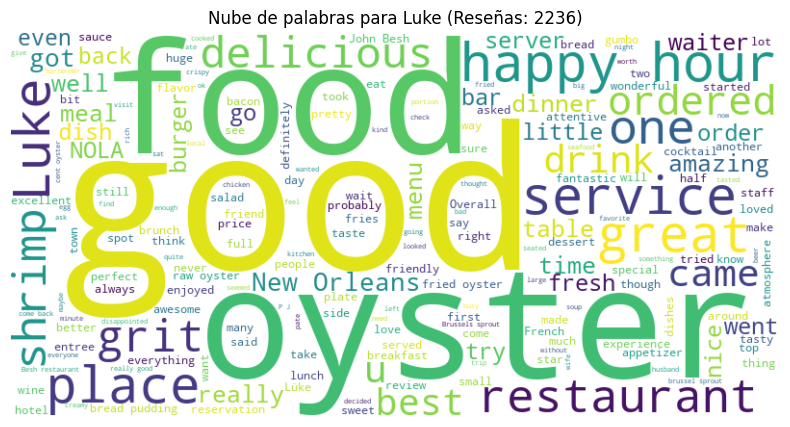

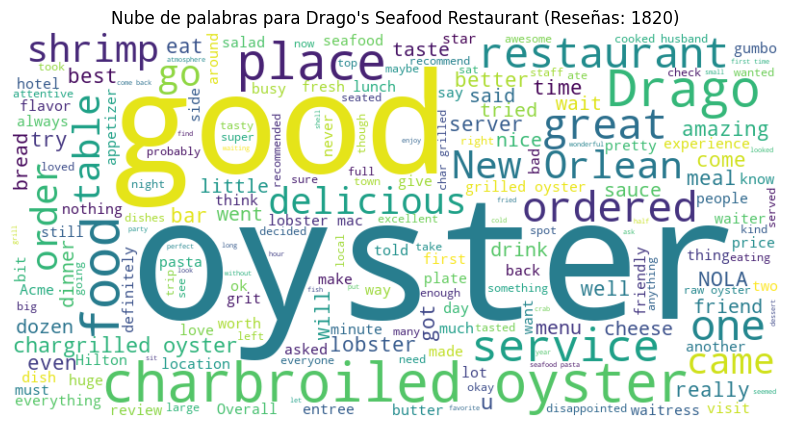

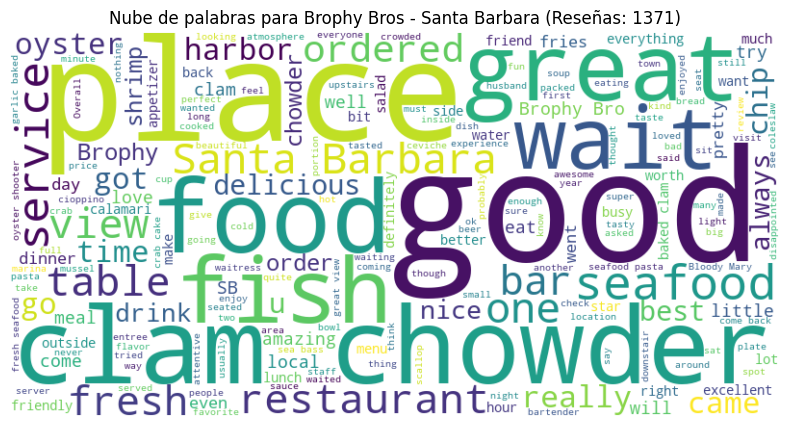

In [22]:
import polars as pl
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear una nube de palabras para cada uno de los 3 restaurantes
for idx, row in enumerate(top_3_pensilvania_seafood.iter_rows()):
    name = row[0]
    review_count = row[1]
    category = row[2]
    
    # Filtrar el DataFrame original para obtener las rese√±as del restaurante actual
    reviews = df_pensilvania.filter(pl.col("name") == name)

    # Concatenar todas las rese√±as en un solo texto
    text = ' '.join(reviews['text'].to_list())
    
    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Sin ejes
    plt.title(f"Nube de palabras para {name} (Rese√±as: {review_count})")
    plt.show()

In [23]:
# Obtener los 3 locales m√°s frecuentes con categor√≠a para cada estado
top_3_florida = top_3_seafood_places(df_florida, seafood_keywords)

# Filtrar los resultados para quedarnos solo con aquellos que contengan 'Seafood' en las categor√≠as
top_3_florida_seafood = top_3_florida.filter(
    pl.col("category").list.contains("Seafood")
)

print("\nTop 3 locales de mariscos en Florida que contienen 'Seafood' en categor√≠as:")
print(top_3_florida_seafood)

C:\Users\KAREN\AppData\Local\Temp\ipykernel_1340\2368994145.py:13: DeprecationWarning:

`pl.count()` is deprecated. Please use `pl.len()` instead.




Top 3 locales de mariscos en Florida que contienen 'Seafood' en categor√≠as:
shape: (3, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ name          ‚îÜ review_count ‚îÜ category                        ‚îÇ
‚îÇ ---           ‚îÜ ---          ‚îÜ ---                             ‚îÇ
‚îÇ str           ‚îÜ u32          ‚îÜ list[str]                       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Oceana Grill  ‚îÜ 2481         ‚îÜ ["Restaurants", "Seafood", ‚Ä¶ "‚Ä¶ ‚îÇ
‚îÇ Oyster House  ‚îÜ 1144         ‚îÜ ["Restaurants", "Steakhouses",‚Ä¶ ‚îÇ
‚îÇ Bourbon House ‚îÜ 934          ‚îÜ ["Restaurants", "Cajun/Creole"‚Ä¶ ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚

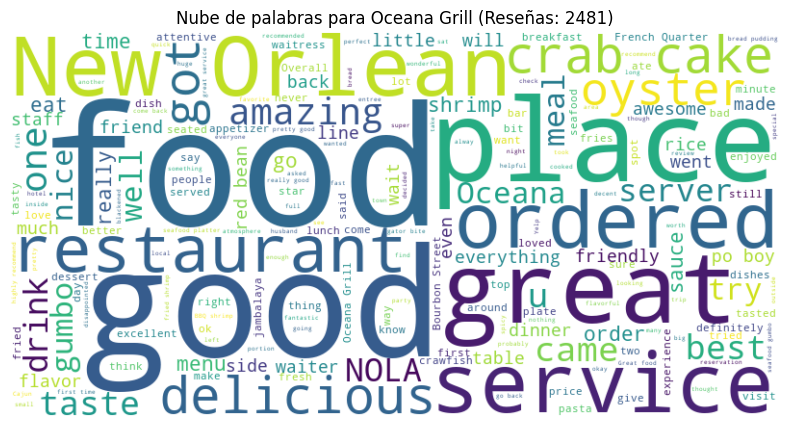

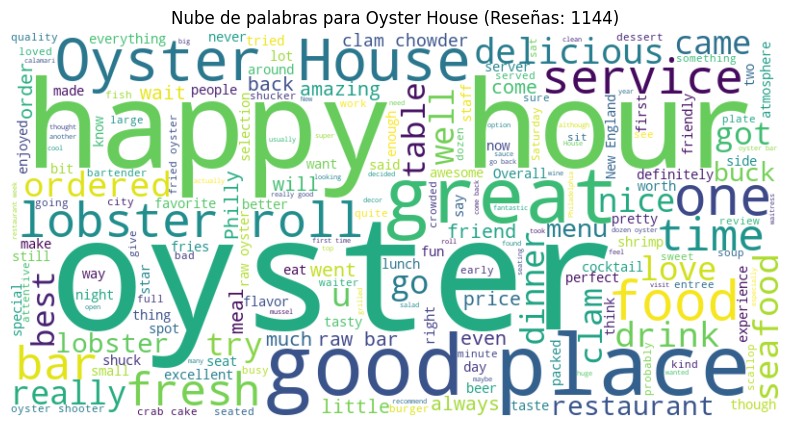

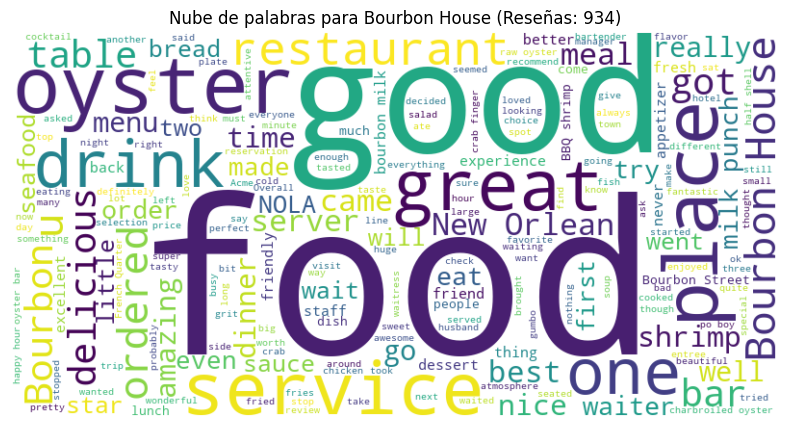

In [24]:
# Crear una nube de palabras para cada uno de los 3 restaurantes
for idx, row in enumerate(top_3_florida_seafood.iter_rows()):
    name = row[0]
    review_count = row[1]
    category = row[2]
    
    # Filtrar el DataFrame original para obtener las rese√±as del restaurante actual
    reviews = df_florida.filter(pl.col("name") == name)

    # Concatenar todas las rese√±as en un solo texto
    text = ' '.join(reviews['text'].to_list())
    
    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Sin ejes
    plt.title(f"Nube de palabras para {name} (Rese√±as: {review_count})")
    plt.show()

In [25]:
# Obtener los 3 locales m√°s frecuentes con categor√≠a para cada estado
top_3_tennessee = top_3_seafood_places(df_tenesse, seafood_keywords)

# Filtrar los resultados para quedarnos solo con aquellos que contengan 'Seafood' en las categor√≠as
top_3_tennessee_seafood = top_3_tennessee.filter(
    pl.col("category").list.contains("Seafood")
)

# Eliminar el tercer resultado espec√≠fico (St. Elmo Steak House)
top_3_tennessee_seafood = top_3_tennessee_seafood.filter(
    pl.col("name") != "St. Elmo Steak House"
)

print("\nTop 3 locales de mariscos en Tennessee que contienen 'Seafood' en categor√≠as (sin St. Elmo Steak House):")
print(top_3_tennessee_seafood)


C:\Users\KAREN\AppData\Local\Temp\ipykernel_1340\2368994145.py:13: DeprecationWarning:

`pl.count()` is deprecated. Please use `pl.len()` instead.




Top 3 locales de mariscos en Tennessee que contienen 'Seafood' en categor√≠as (sin St. Elmo Steak House):
shape: (3, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ name                            ‚îÜ review_count ‚îÜ category                        ‚îÇ
‚îÇ ---                             ‚îÜ ---          ‚îÜ ---                             ‚îÇ
‚îÇ str                             ‚îÜ u32          ‚îÜ list[str]                       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ GW Fins                         ‚îÜ 1107         ‚îÜ ["Seafood", "Gluten-Free", ‚Ä¶ "‚Ä¶ ‚

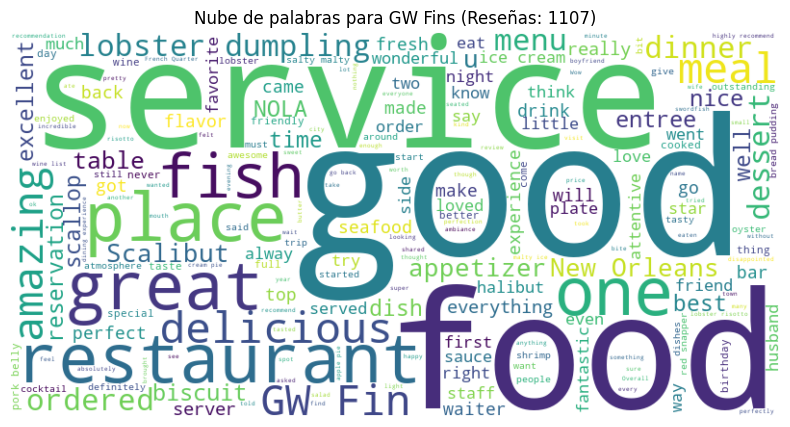

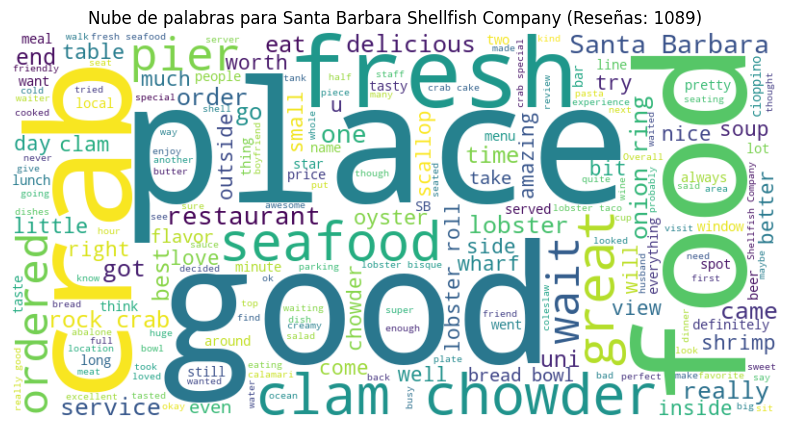

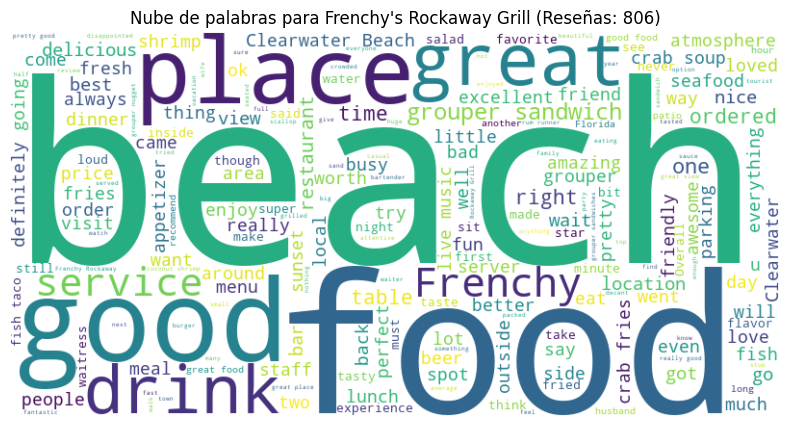

In [26]:
# Crear una nube de palabras para cada uno de los 3 restaurantes
for idx, row in enumerate(top_3_tennessee_seafood.iter_rows()):
    name = row[0]
    review_count = row[1]
    category = row[2]
    
    # Filtrar el DataFrame original para obtener las rese√±as del restaurante actual
    reviews = df_tenesse.filter(pl.col("name") == name)

    # Concatenar todas las rese√±as en un solo texto
    text = ' '.join(reviews['text'].to_list())
    
    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Sin ejes
    plt.title(f"Nube de palabras para {name} (Rese√±as: {review_count})")
    plt.show()

In [27]:
# Filtrar el DataFrame original para obtener solo los locales del top 3
top_3_names_tennessee = top_3_tennessee_seafood['name'].to_list()

# Calcular el promedio de estrellas para los locales del top 3 en Tennessee
promedio_estrellas_tennessee = df_tenesse.filter(
    pl.col('name').is_in(top_3_names_tennessee)
).group_by('name').agg(
    pl.col('stars_x').mean().alias('promedio_estrellas')
)

# Mostrar los resultados
print("Promedio de estrellas en los locales del top 3 en Tennessee:")
print(promedio_estrellas_tennessee)

Promedio de estrellas en los locales del top 3 en Tennessee:
shape: (3, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ name                            ‚îÜ promedio_estrellas ‚îÇ
‚îÇ ---                             ‚îÜ ---                ‚îÇ
‚îÇ str                             ‚îÜ f64                ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Santa Barbara Shellfish Compan‚Ä¶ ‚îÜ 3.980492           ‚îÇ
‚îÇ GW Fins                         ‚îÜ 4.552126           ‚îÇ
‚îÇ Frenchy's Rockaway Grill        ‚îÜ 3.971724           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


In [28]:
import polars as pl
import plotly.graph_objects as go

# --- Para Tennessee ---
# Filtrar el DataFrame original para obtener solo los locales de Tennessee
top_3_names_tennessee = top_3_tennessee_seafood['name'].to_list()

promedio_estrellas_tennessee = df.filter(
    pl.col('name').is_in(top_3_names_tennessee)
).group_by('name').agg(
    pl.col('stars_x').mean().alias('promedio_estrellas')
)

# Convertir a pandas para la gr√°fica
promedio_estrellas_tennessee_pd = promedio_estrellas_tennessee.to_pandas()

# Crear la figura para Tennessee
fig_tennessee = go.Figure()

# A√±adir las representaciones de lunas para Tennessee
for index, row in promedio_estrellas_tennessee_pd.iterrows():
    stars = row['promedio_estrellas']
    name = row['name']
    
    # Calcular lunas llenas, medias y menguantes
    full_moons = int(stars)  # Lunas llenas
    if stars % 1 >= 0.5:
        half_moon = 1  # Luna media
        waning_moon = 0  # Sin luna menguante
    elif stars % 1 >= 0.1:
        half_moon = 0  # No luna media
        waning_moon = 1  # Luna menguante
    else:
        half_moon = 0  # No luna media
        waning_moon = 0  # Sin luna menguante

    empty_moons = 5 - full_moons - half_moon - waning_moon  # Lunas vac√≠as

    stars_representation = 'üåï' * full_moons + ('üåó' * half_moon) + ('üåò' * waning_moon) + ('üåë' * empty_moons)

    fig_tennessee.add_trace(go.Bar(
        x=[name],
        y=[stars],
        name=stars_representation,
        hovertemplate=f'{name}: {stars:.2f} Estrellas<br>{stars_representation}',
        text=stars_representation,
        textposition='inside'
    ))

# Ajustes del layout para Tennessee
fig_tennessee.update_layout(
    title='Promedio de Estrellas por Restaurante en Tennessee',
    xaxis_title='Restaurante',
    yaxis_title='Promedio de Estrellas',
    yaxis=dict(range=[0, 5]),
    showlegend=False,
    margin=dict(l=40, r=40, t=40, b=40)
)

# Mostrar la gr√°fica para Tennessee
fig_tennessee.show()




In [29]:
# Filtrar el DataFrame original para obtener solo los locales del top 3
top_3_names_florida = top_3_florida_seafood['name'].to_list()

# Calcular el promedio de estrellas para los locales del top 3 en Florida
promedio_estrellas_florida = df_florida.filter(
    pl.col('name').is_in(top_3_names_florida)
).group_by('name').agg(
    pl.col('stars_x').mean().alias('promedio_estrellas')
)

# Mostrar los resultados
print("Promedio de estrellas en los locales del top 3 en Florida:")
print(promedio_estrellas_florida)


Promedio de estrellas en los locales del top 3 en Florida:
shape: (3, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ name          ‚îÜ promedio_estrellas ‚îÇ
‚îÇ ---           ‚îÜ ---                ‚îÇ
‚îÇ str           ‚îÜ f64                ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Bourbon House ‚îÜ 3.696151           ‚îÇ
‚îÇ Oyster House  ‚îÜ 4.235392           ‚îÇ
‚îÇ Oceana Grill  ‚îÜ 3.959714           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


In [30]:
# Convertir a pandas para la gr√°fica
promedio_estrellas_florida_pd = promedio_estrellas_florida.to_pandas()

# Crear la figura para Florida
fig_florida = go.Figure()

# A√±adir las representaciones de lunas para Florida
for index, row in promedio_estrellas_florida_pd.iterrows():
    stars = row['promedio_estrellas']
    name = row['name']
    
    # Calcular lunas llenas, medias y menguantes
    full_moons = int(stars)  # Lunas llenas
    if stars % 1 >= 0.5:
        half_moon = 1  # Luna media
        waning_moon = 0  # Sin luna menguante
    elif stars % 1 >= 0.1:
        half_moon = 0  # No luna media
        waning_moon = 1  # Luna menguante
    else:
        half_moon = 0  # No luna media
        waning_moon = 0  # Sin luna menguante

    empty_moons = 5 - full_moons - half_moon - waning_moon  # Lunas vac√≠as

    stars_representation = 'üåï' * full_moons + ('üåó' * half_moon) + ('üåò' * waning_moon) + ('üåë' * empty_moons)

    fig_florida.add_trace(go.Bar(
        x=[name],
        y=[stars],
        name=stars_representation,
        hovertemplate=f'{name}: {stars:.2f} Estrellas<br>{stars_representation}',
        text=stars_representation,
        textposition='inside'
    ))

# Ajustes del layout para Florida
fig_florida.update_layout(
    title='Promedio de Estrellas por Restaurante en Florida',
    xaxis_title='Restaurante',
    yaxis_title='Promedio de Estrellas',
    yaxis=dict(range=[0, 5]),
    showlegend=False,
    margin=dict(l=40, r=40, t=40, b=40)
)

# Mostrar la gr√°fica para Florida
fig_florida.show()




In [31]:
# Filtrar el DataFrame original para obtener solo los locales del top 3
top_3_names_pensilvania = top_3_pensilvania_seafood['name'].to_list()

# Calcular el promedio de estrellas para los locales del top 3 en Pensilvania
promedio_estrellas_pensilvania = df_pensilvania.filter(
    pl.col('name').is_in(top_3_names_pensilvania)
).group_by('name').agg(
    pl.col('stars_x').mean().alias('promedio_estrellas')
)

# Mostrar los resultados
print("Promedio de estrellas en los locales del top 3 en Pensilvania:")
print(promedio_estrellas_pensilvania)


Promedio de estrellas en los locales del top 3 en Pensilvania:
shape: (3, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ name                        ‚îÜ promedio_estrellas ‚îÇ
‚îÇ ---                         ‚îÜ ---                ‚îÇ
‚îÇ str                         ‚îÜ f64                ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Drago's Seafood Restaurant  ‚îÜ 3.700811           ‚îÇ
‚îÇ Brophy Bros - Santa Barbara ‚îÜ 4.082563           ‚îÇ
‚îÇ Luke                        ‚îÜ 4.165159           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


In [32]:
# Convertir a pandas para la gr√°fica
promedio_estrellas_pennsylvania_pd = promedio_estrellas_pensilvania.to_pandas()

# Crear la figura para Pensilvania
fig_pennsylvania = go.Figure()

# A√±adir las representaciones de lunas para Pensilvania
for index, row in promedio_estrellas_pennsylvania_pd.iterrows():
    stars = row['promedio_estrellas']
    name = row['name']
    
    # Calcular lunas llenas, medias y menguantes
    full_moons = int(stars)  # Lunas llenas
    if stars % 1 >= 0.5:
        half_moon = 1  # Luna media
        waning_moon = 0  # Sin luna menguante
    elif stars % 1 >= 0.1:
        half_moon = 0  # No luna media
        waning_moon = 1  # Luna menguante
    else:
        half_moon = 0  # No luna media
        waning_moon = 0  # Sin luna menguante

    empty_moons = 5 - full_moons - half_moon - waning_moon  # Lunas vac√≠as

    stars_representation = 'üåï' * full_moons + ('üåó' * half_moon) + ('üåò' * waning_moon) + ('üåë' * empty_moons)

    fig_pennsylvania.add_trace(go.Bar(
        x=[name],
        y=[stars],
        name=stars_representation,
        hovertemplate=f'{name}: {stars:.1f} Estrellas<br>{stars_representation}',
        text=stars_representation,
        textposition='inside'
    ))

# Ajustes del layout para Pensilvania
fig_pennsylvania.update_layout(
    title='Promedio de Estrellas por Restaurante en Pensilvania',
    xaxis_title='Restaurante',
    yaxis_title='Promedio de Estrellas',
    yaxis=dict(range=[0, 5]),
    showlegend=False,
    margin=dict(l=40, r=40, t=40, b=40)
)

# Mostrar la gr√°fica para Pensilvania
fig_pennsylvania.show()

    

